In [ ]:
greatlight98, heeyong0496

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
import itertools
import gc
import pickle
from xgboost import XGBRegressor
from xgboost import plot_importance

%matplotlib inline

In [2]:
item_categories = pd.read_csv('c:/kaggle/item_categories.csv')
item_df = pd.read_csv('c:/kaggle/items.csv')
sample_submission = pd.read_csv('c:/kaggle/sample_submission.csv')
shops = pd.read_csv('c:/kaggle/shops.csv')
train_df = pd.read_csv('c:/kaggle/sales_train.csv')
test_df = pd.read_csv('c:/kaggle/test.csv').set_index('ID')

In [3]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
item_categories.tail()

,item_category_name,item_category_id
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


In [5]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [6]:
item_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [8]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [9]:
sample_submission.tail(100)

,ID,item_cnt_month
214100,214100,0.5
214101,214101,0.5
214102,214102,0.5
214103,214103,0.5
214104,214104,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


In [11]:
sample_submission.tail()

,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


In [12]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [13]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [14]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [15]:
train_df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [17]:
test_df.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [18]:
test_df.tail()

,shop_id,item_id
ID,,
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648
214199,45,969


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   shop_id  214200 non-null  int64
 1   item_id  214200 non-null  int64
dtypes: int64(2)
memory usage: 4.9 MB


In [20]:
train_df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [21]:
sum(train_df.duplicated())

6

In [22]:
sum(test_df.duplicated())

0

In [23]:
train_df.drop_duplicates(inplace=True)   # 중복 제거

In [24]:
sum(train_df.duplicated())

0

In [25]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


<AxesSubplot:>

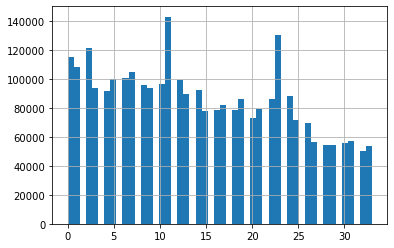

In [26]:
train_df['date_block_num'].hist(bins=50)

<AxesSubplot:>

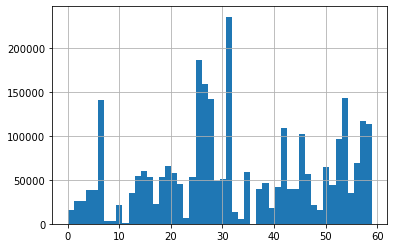

In [27]:
train_df['shop_id'].hist(bins=50)

In [28]:
train_df['item_cnt_day'].sum()

3648200.0

<AxesSubplot:xlabel='item_price'>

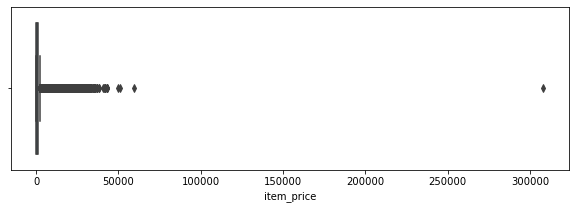

In [29]:
plt.figure(figsize=(10,3))
sns.boxplot(x=train_df.item_price)

In [30]:
train_df = train_df[train_df.item_price < 50000]   # 이상치 제거

In [31]:
train_df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


<AxesSubplot:xlabel='item_price'>

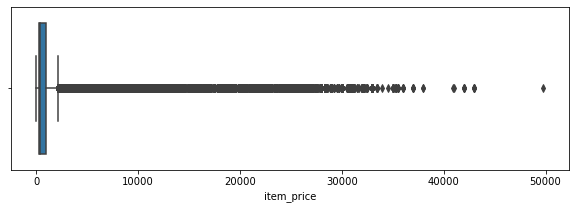

In [32]:
plt.figure(figsize=(10,3))
sns.boxplot(x=train_df.item_price)

<AxesSubplot:xlabel='item_cnt_day'>

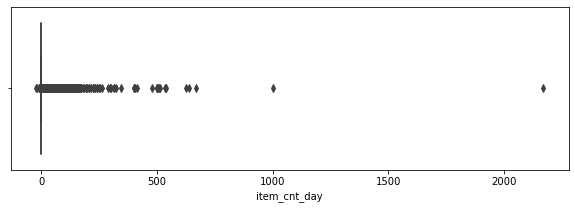

In [33]:
plt.figure(figsize=(10,3))
sns.boxplot(x=train_df.item_cnt_day)  

In [34]:
train_df =  train_df[train_df.item_cnt_day < 500]  # 이상치 제거

In [35]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935826e+06,2.935826e+06,2.935826e+06,2.935826e+06,2.935826e+06
mean,1.456986e+01,3.300178e+01,1.019721e+04,8.907121e+02,1.239344e+00
std,9.422973e+00,1.622696e+01,6.324294e+03,1.719911e+03,1.923299e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,4.978200e+04,4.800000e+02


In [36]:
train_df = train_df[train_df.item_cnt_day >= 0]
train_df = train_df[train_df.item_price >= 0]

In [37]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [38]:
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'

In [39]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])

In [40]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [41]:
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [42]:
shops.city.value_counts()

Москва              13
Якутск               4
Тюмень               3
РостовНаДону         3
Воронеж              3
Н.Новгород           2
СПб                  2
Самара               2
Уфа                  2
Казань               2
Красноярск           2
Новосибирск          2
Жуковский            2
Калуга               1
Омск                 1
Балашиха             1
Вологда              1
Выездная             1
Чехов                1
Волжский             1
Химки                1
Сургут               1
Томск                1
Курск                1
Ярославль            1
СергиевПосад         1
Коломна              1
Адыгея               1
Цифровой             1
Интернет-магазин     1
Мытищи               1
Name: city, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
shops['city_code'] = le.fit_transform(shops['city'])
shops = shops[['shop_id', 'city_code']]
shops.head()

,shop_id,city_code
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [45]:
item_categories.head()#greatlight98, heeyong0496


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [46]:
item_categories['split_name'] = item_categories['item_category_name'].str.split(' - ')
item_categories['type'] = item_categories['split_name'].map(lambda x: x[0].strip())
item_categories['type_code'] = le.fit_transform(item_categories['type'])

In [47]:
item_categories.head()

,item_category_name,item_category_id,split_name,type,type_code
0,PC - Гарнитуры/Наушники,0,"[PC, Гарнитуры/Наушники]",PC,0
1,Аксессуары - PS2,1,"[Аксессуары, PS2]",Аксессуары,1
2,Аксессуары - PS3,2,"[Аксессуары, PS3]",Аксессуары,1
3,Аксессуары - PS4,3,"[Аксессуары, PS4]",Аксессуары,1
4,Аксессуары - PSP,4,"[Аксессуары, PSP]",Аксессуары,1


In [48]:
item_categories['subtype'] = item_categories['split_name'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_categories['subtype_code'] = le.fit_transform(item_categories['subtype'])#github greatlight98
item_categories = item_categories[['item_category_id', 'type_code', 'subtype_code']]

In [49]:
item_categories.head()

,item_category_id,type_code,subtype_code
0,0,0,31
1,1,1,11
2,2,1,12
3,3,1,13
4,4,1,15


In [50]:
item_categories.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   item_category_id  5 non-null      int64
 1   type_code         5 non-null      int32
 2   subtype_code      5 non-null      int32
dtypes: int32(2), int64(1)
memory usage: 208.0 bytes


In [51]:
item_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [52]:
item_df.drop(['item_name'], axis=1, inplace=True)

In [53]:
item_df.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [54]:
shops.head()

,shop_id,city_code
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [55]:
test_df.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [56]:
test_df.shop_id.value_counts()

2     5100
47    5100
37    5100
38    5100
39    5100
41    5100
42    5100
44    5100
45    5100
46    5100
48    5100
3     5100
49    5100
50    5100
52    5100
53    5100
55    5100
56    5100
57    5100
58    5100
36    5100
35    5100
34    5100
31    5100
4     5100
5     5100
6     5100
7     5100
10    5100
12    5100
14    5100
15    5100
16    5100
18    5100
19    5100
21    5100
22    5100
24    5100
25    5100
26    5100
28    5100
59    5100
Name: shop_id, dtype: int64

In [57]:
len(test_df.shop_id.unique())

42

In [58]:
len(set(test_df.item_id) - set(train_df.item_id))

363

In [59]:
num_date_block_num = len(train_df.date_block_num.value_counts())
num_date_block_num

34

In [60]:
ts = time.time()
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = train_df[train_df.date_block_num == i]
    matrix.append(np.array(list(itertools.product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
# int8 -> Byte (-128 to 127), int16 -> Integer (-32768 to 32767) #github greatlight98
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)
time.time()-ts

23.860921382904053

In [61]:
matrix.head()

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32


In [62]:
sales = train_df[train_df.date_block_num == 1]

In [63]:
sales.shop_id.unique()

array([50, 47, 51, 52, 42, 46, 43, 54, 56, 59,  7, 53, 16, 18, 19, 14, 15,
       13, 23, 24, 21, 25, 22,  4,  3,  5,  1,  2,  6,  0,  8, 12, 10, 31,
       32, 35, 44, 41, 45, 37, 38, 26, 27, 29, 30, 28], dtype=int64)

In [64]:
len(sales)

108326

In [65]:
list(itertools.product([1], sales.shop_id.unique(), sales.item_id.unique()))

[(1, 50, 3880),
 (1, 50, 4128),
 (1, 50, 4124),
 (1, 50, 3879),
 (1, 50, 3885),
 (1, 50, 3950),
 (1, 50, 4163),
 (1, 50, 3897),
 (1, 50, 3941),
 (1, 50, 3959),
 (1, 50, 4036),
 (1, 50, 3983),
 (1, 50, 3993),
 (1, 50, 4127),
 (1, 50, 3890),
 (1, 50, 4115),
 (1, 50, 3878),
 (1, 50, 3834),
 (1, 50, 3850),
 (1, 50, 3851),
 (1, 50, 3788),
 (1, 50, 3805),
 (1, 50, 3869),
 (1, 50, 3870),
 (1, 50, 3871),
 (1, 50, 4164),
 (1, 50, 4244),
 (1, 50, 4245),
 (1, 50, 4248),
 (1, 50, 4249),
 (1, 50, 4251),
 (1, 50, 4266),
 (1, 50, 4092),
 (1, 50, 4282),
 (1, 50, 4241),
 (1, 50, 4227),
 (1, 50, 4240),
 (1, 50, 3508),
 (1, 50, 3328),
 (1, 50, 3321),
 (1, 50, 3322),
 (1, 50, 3360),
 (1, 50, 3362),
 (1, 50, 3366),
 (1, 50, 3367),
 (1, 50, 3320),
 (1, 50, 3325),
 (1, 50, 3326),
 (1, 50, 3327),
 (1, 50, 3476),
 (1, 50, 3702),
 (1, 50, 3705),
 (1, 50, 3718),
 (1, 50, 3698),
 (1, 50, 3719),
 (1, 50, 3743),
 (1, 50, 3745),
 (1, 50, 3622),
 (1, 50, 3624),
 (1, 50, 3693),
 (1, 50, 3490),
 (1, 50, 3371),
 (1, 50,

In [66]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [67]:
len(train_df)

2928469

In [68]:
train_df['revenue'] = train_df['item_price'] * train_df['item_cnt_day']

In [69]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00


In [70]:
group = train_df.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})

In [71]:
group.head()

item_cnt_day
                                        sum
date_block_num shop_id item_id             
0              0       32               6.0
                       33               3.0
                       35               1.0
                       43               1.0
                       51               2.0

In [72]:
group.columns = ['item_cnt_month']

In [73]:
group.head()

item_cnt_month
date_block_num shop_id item_id                
0              0       32                  6.0
                       33                  3.0
                       35                  1.0
                       43                  1.0
                       51                  2.0

In [74]:
group.reset_index(inplace=True)

In [75]:
group.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [76]:
matrix.head()

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28
142572,0,0,29
138861,0,0,32


In [77]:
matrix = pd.merge(matrix, group, how='left')

In [78]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,NaN
1,0,0,27,NaN
2,0,0,28,NaN
3,0,0,29,NaN
4,0,0,32,6.0


In [79]:
len(matrix)

10884460

In [80]:
len(group)

1608221

In [81]:
matrix['item_cnt_month'] = (matrix['item_cnt_month'].fillna(0).clip(0, 30).astype(np.float16))

In [82]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0


In [83]:
test_df.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [84]:
test_df.reset_index(inplace=True)

In [85]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [86]:
test_df['date_block_num'] = 34
test_df['date_block_num'] = test_df['date_block_num'].astype(np.int8)
test_df['shop_id'] = test_df['shop_id'].astype(np.int8)
test_df['item_id'] = test_df['item_id'].astype(np.int16)

In [87]:
test_df.head()#github greatlight98

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [88]:
matrix = pd.concat([matrix, test_df], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0, inplace=True) # for 34 month
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID
0,0,0,19,0.0,0.0
1,0,0,27,0.0,0.0
2,0,0,28,0.0,0.0
3,0,0,29,0.0,0.0
4,0,0,32,6.0,0.0


In [89]:
matrix.tail()

,date_block_num,shop_id,item_id,item_cnt_month,ID
11098655,34,45,18454,0.0,214195.0
11098656,34,45,16188,0.0,214196.0
11098657,34,45,15757,0.0,214197.0
11098658,34,45,19648,0.0,214198.0
11098659,34,45,969,0.0,214199.0


In [90]:
len(matrix)

11098660

In [91]:
matrix = pd.merge(matrix, shops, on=['shop_id'], how='left')#gi
matrix = pd.merge(matrix, item_df, on=['item_id'], how='left')#th
matrix = pd.merge(matrix, item_categories, on=['item_category_id'], how='left')#ub
matrix['city_code'] = matrix['city_code'].astype(np.int8)#gr
matrix['item_category_id'] = matrix['item_category_id'].astype(np.int8)#eat
matrix['type_code'] = matrix['type_code'].astype(np.int8)#light
matrix['subtype_code'] = matrix['subtype_code'].astype(np.int8)#98

In [92]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code
0,0,0,19,0.0,0.0,29,40,11,6
1,0,0,27,0.0,0.0,29,19,5,12
2,0,0,28,0.0,0.0,29,30,8,57
3,0,0,29,0.0,0.0,29,23,5,18
4,0,0,32,6.0,0.0,29,40,11,6


In [93]:
matrix[matrix['date_block_num'] == 0]

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code
0,0,0,19,0.0,0.0,29,40,11,6
1,0,0,27,0.0,0.0,29,19,5,12
2,0,0,28,0.0,0.0,29,30,8,57
3,0,0,29,0.0,0.0,29,23,5,18
4,0,0,32,6.0,0.0,29,40,11,6
...,...,...,...,...,...,...,...,...,...
364945,0,59,22149,0.0,0.0,30,40,11,6
364946,0,59,22151,2.0,0.0,30,40,11,6
364947,0,59,22154,1.0,0.0,30,37,11,1
364948,0,59,22160,0.0,0.0,30,40,11,6


In [94]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00


In [95]:
def lag_feature(df, lags, col):#g
    tmp = df[['date_block_num','shop_id','item_id',col]]#it
    for i in lags:#h
        shifted = tmp.copy()#ub g
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]#re
        shifted['date_block_num'] += i#atli
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')#gh
    return df#t

In [96]:
matrix = lag_feature(matrix, [1,2,3,6,12], 'item_cnt_month')#9

In [97]:
matrix.head()#8

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,0,19,0.0,0.0,29,40,11,6,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,8,57,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,11,6,NaN,NaN,NaN,NaN,NaN


In [98]:
group = matrix.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_avg_item_cnt']#github greatlight98

In [99]:
group.head()

,date_avg_item_cnt
date_block_num,
0,0.354980
1,0.333008
2,0.367432
3,0.287354
4,0.270996


In [100]:
group.reset_index(inplace=True)

In [101]:
group.head()

,date_block_num,date_avg_item_cnt
0,0,0.354980
1,1,0.333008
2,2,0.367432
3,3,0.287354
4,4,0.270996


In [102]:
matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt
0,0,0,19,0.0,0.0,29,40,11,6,NaN,NaN,NaN,NaN,NaN,0.35498
1,0,0,27,0.0,0.0,29,19,5,12,NaN,NaN,NaN,NaN,NaN,0.35498
2,0,0,28,0.0,0.0,29,30,8,57,NaN,NaN,NaN,NaN,NaN,0.35498
3,0,0,29,0.0,0.0,29,23,5,18,NaN,NaN,NaN,NaN,NaN,0.35498
4,0,0,32,6.0,0.0,29,40,11,6,NaN,NaN,NaN,NaN,NaN,0.35498


In [103]:
matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')

In [104]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt,date_avg_item_cnt_lag_1
0,0,0,19,0.0,0.0,29,40,11,6,NaN,NaN,NaN,NaN,NaN,0.35498,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,NaN,NaN,NaN,NaN,0.35498,NaN
2,0,0,28,0.0,0.0,29,30,8,57,NaN,NaN,NaN,NaN,NaN,0.35498,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,NaN,NaN,NaN,NaN,0.35498,NaN
4,0,0,32,6.0,0.0,29,40,11,6,NaN,NaN,NaN,NaN,NaN,0.35498,NaN


In [105]:
matrix.tail()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt,date_avg_item_cnt_lag_1
11098655,34,45,18454,0.0,214195.0,20,55,13,4,1.0,0.0,0.0,0.0,NaN,0.0,0.266846
11098656,34,45,16188,0.0,214196.0,20,64,14,44,0.0,0.0,NaN,NaN,NaN,0.0,0.266846
11098657,34,45,15757,0.0,214197.0,20,55,13,4,0.0,0.0,0.0,0.0,0.0,0.0,0.266846
11098658,34,45,19648,0.0,214198.0,20,40,11,6,0.0,0.0,0.0,0.0,NaN,0.0,0.266846
11098659,34,45,969,0.0,214199.0,20,37,11,1,0.0,0.0,0.0,0.0,0.0,0.0,0.266846


In [106]:
matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)
matrix.tail()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1
11098655,34,45,18454,0.0,214195.0,20,55,13,4,1.0,0.0,0.0,0.0,NaN,0.266846
11098656,34,45,16188,0.0,214196.0,20,64,14,44,0.0,0.0,NaN,NaN,NaN,0.266846
11098657,34,45,15757,0.0,214197.0,20,55,13,4,0.0,0.0,0.0,0.0,0.0,0.266846
11098658,34,45,19648,0.0,214198.0,20,40,11,6,0.0,0.0,0.0,0.0,NaN,0.266846
11098659,34,45,969,0.0,214199.0,20,37,11,1,0.0,0.0,0.0,0.0,0.0,0.266846


matrix에 월별 item별 평균 판매 수량(date_item_avg_item_cnt) lag 추가하기

In [107]:
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_item_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id'], how='left')
matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별, shop_id별 평균 판매 수량(date_shop_avg_item_cnt) lag 추가하기

In [108]:
group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_shop_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별 category별 평균 판매 수량(date_cat_avg_item_cnt) lag 추가하기

In [109]:
group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_cat_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_category_id'], how='left')
matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_cat_avg_item_cnt')
matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별 shop별, category별 평균 판매 수량(date_shop_cat_avg_item_cnt) lag 추가하기

In [110]:
group = matrix.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
matrix['date_shop_cat_avg_item_cnt'] = matrix['date_shop_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_cat_avg_item_cnt')
matrix.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)#github greatlight98

matrix에 월별 shop별, type_code별 평균 판매 수량(date_shop_type_avg_item_cnt) lag 추가하기

In [111]:
group = matrix.groupby(['date_block_num', 'shop_id', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_type_avg_item_cnt']
group.reset_index(inplace=True)#github greatlight98

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'type_code'], how='left')
matrix['date_shop_type_avg_item_cnt'] = matrix['date_shop_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_type_avg_item_cnt')
matrix.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)#github greatlight98

matrix에 월별 shop별, subtype_code별 평균 판매 수량(date_shop_subtype_avg_item_cnt) lag 추가하기

In [112]:
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix['date_shop_subtype_avg_item_cnt'] = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_subtype_avg_item_cnt')
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별 city_code별 평균 판매 수량(date_city_avg_item_cnt) lag 추가하기

In [113]:
group = matrix.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'city_code'], how='left')
matrix['date_city_avg_item_cnt'] = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_city_avg_item_cnt')
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별 item별, city_code별 평균 판매 수량(date_item_city_avg_item_cnt) lag 추가하기

In [114]:
group = matrix.groupby(['date_block_num', 'item_id', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'city_code'], how='left')
matrix['date_item_city_avg_item_cnt'] = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_item_city_avg_item_cnt')
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별 type_code별 평균 판매 수량(date_type_avg_item_cnt) lag 추가하기

In [115]:
group = matrix.groupby(['date_block_num', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_type_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'type_code'], how='left')
matrix['date_type_avg_item_cnt'] = matrix['date_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_type_avg_item_cnt')
matrix.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)

matrix에 월별 subtype_code별 평균 판매 수량(date_subtype_avg_item_cnt) lag 추가하기

In [116]:
group = matrix.groupby(['date_block_num', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_subtype_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'subtype_code'], how='left')
matrix['date_subtype_avg_item_cnt'] = matrix['date_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_subtype_avg_item_cnt')
matrix.drop(['date_subtype_avg_item_cnt'], axis=1, inplace=True)

In [117]:
# Matrix에 item_id별 평균 가격 추가
group = train_df.groupby(['item_id']).agg({'item_price': ['mean']})
group.columns = ['item_avg_item_price']
group.reset_index(inplace=True)
matrix = pd.merge(matrix, group, on=['item_id'], how='left')
matrix['item_avg_item_price'] = matrix['item_avg_item_price'].astype(np.float16)

In [118]:
# Matrix에 월별 item_id별 평균 가격 추가
group = train_df.groupby(['date_block_num', 'item_id']).agg({'item_price': ['mean']})
group.columns = ['date_item_avg_item_price']
group.reset_index(inplace=True)
matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id'], how='left')
matrix['date_item_avg_item_price'] = matrix['date_item_avg_item_price'].astype(np.float16)

In [119]:
# Matrix에 해당 월별 item_id별 평균 가격이 어떤 가격 트렌드를 가지고 있는지 (delta_price_lag) 구하기
lags = [1, 2, 3, 4, 5, 6]
matrix = lag_feature(matrix, lags, 'date_item_avg_item_price')
for lag in lags:
    matrix['delta_price_lag_'+str(lag)] = \
    (matrix['date_item_avg_item_price_lag_'+str(lag)] - matrix['item_avg_item_price']) / matrix['item_avg_item_price']

In [120]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_item_avg_item_price_lag_3,date_item_avg_item_price_lag_4,date_item_avg_item_price_lag_5,date_item_avg_item_price_lag_6,delta_price_lag_1,delta_price_lag_2,delta_price_lag_3,delta_price_lag_4,delta_price_lag_5,delta_price_lag_6
0,0,0,19,0.0,0.0,29,40,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0.0,29,30,8,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,32,6.0,0.0,29,40,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
def select_trend(row):
    for lag in lags:
        if row['delta_price_lag_'+str(lag)]:
            return row['delta_price_lag_'+str(lag)]
    return 0
matrix['delta_price_lag'] = matrix.apply(select_trend, axis=1)
matrix['delta_price_lag'] = matrix['delta_price_lag'].astype(np.float16)
matrix['delta_price_lag'].fillna(0, inplace=True)

In [122]:
# delta_price_lag를 구했으므로 필요없는 feature는 drop
features_to_drop = ['item_avg_item_price', 'date_item_avg_item_price']
for i in lags:
    features_to_drop += ['date_item_avg_item_price_lag_'+str(i)]
    features_to_drop += ['delta_price_lag_'+str(i)]#g

In [123]:
matrix.drop(features_to_drop, axis=1, inplace=True)

In [124]:
group = train_df.groupby(['date_block_num', 'shop_id']).agg({'revenue': ['sum']})
group.columns = ['date_shop_revenue']
group.reset_index(inplace=True)
matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id'], how='left')
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)#i

In [125]:
group = group.groupby(['shop_id']).agg({'date_shop_revenue': ['mean']})
group.columns = ['shop_avg_revenue']
group.reset_index(inplace=True)#t

In [126]:
matrix = pd.merge(matrix, group, on=['shop_id'], how='left')
matrix['shop_avg_revenue'] = matrix['shop_avg_revenue'].astype(np.float32)#h

In [127]:
matrix['delta_revenue'] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix['delta_revenue'] = matrix['delta_revenue'].astype(np.float16)#u

In [128]:
matrix = lag_feature(matrix, [1], 'delta_revenue')#b

In [129]:
matrix.drop(['date_shop_revenue', 'shop_avg_revenue', 'delta_revenue'], axis=1, inplace=True)#g

In [130]:
matrix['month'] = matrix['date_block_num'] % 12#r

In [131]:
days = pd.Series([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
matrix['days'] = matrix['month'].map(days).astype(np.int8)#e

In [132]:
matrix.head()#a

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days
0,0,0,19,0.0,0.0,29,40,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,31
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,31
2,0,0,28,0.0,0.0,29,30,8,57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,31
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,31
4,0,0,32,6.0,0.0,29,40,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,31


마지막 판매가 있고 나서부터 지난 개월 수 (shop-item pair별, item별)

In [133]:
# shop-item pari별
cache = {}
matrix['item_shop_last_sale'] = -1
matrix['item_shop_last_sale'] = matrix['item_shop_last_sale'].astype(np.int8)

for index, row in matrix.iterrows():
    key = str(row.item_id) + ' ' + str(row.shop_id)
    if key not in cache:
        if row.item_cnt_month != 0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        matrix.at[index, 'item_shop_last_sale'] = row.date_block_num - last_date_block_num
        cache[key] = row.date_block_num#t

In [134]:
# item별
cache = {}
matrix['item_last_sale'] = -1
matrix['item_last_sale'] = matrix['item_last_sale'].astype(np.int8)

for index, row in matrix.iterrows():
    key = row.item_id
    if key not in cache:
        if row.item_cnt_month != 0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        if row.date_block_num > last_date_block_num:
            matrix.at[index, 'item_last_sale'] = row.date_block_num - last_date_block_num
            cache[key] = row.date_block_num#l

첫번째 판매 후 지난 개월 수 (shop-item pair, item pair 별)

In [135]:
matrix.groupby(['item_id','shop_id'])['date_block_num']#i

In [136]:
matrix['date_block_num'] - matrix.groupby(['item_id', 'shop_id'])['date_block_num'].transform('min')#g

0            0
1            0
2            0
3            0
4            0
            ..
11098655    11
11098656     2
11098657    34
11098658    11
11098659    17
Name: date_block_num, Length: 11098660, dtype: int8

In [137]:
matrix['item_shop_first_sale'] = matrix['date_block_num'] - matrix.groupby(['item_id', 'shop_id'])['date_block_num'].transform('min')#h

In [138]:
matrix['item_first_sale'] = matrix['date_block_num'] - matrix.groupby('item_id')['date_block_num'].transform('min')#t

In [139]:
matrix.head()#9

,date_block_num,shop_id,item_id,item_cnt_month,ID,city_code,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
0,0,0,19,0.0,0.0,29,40,11,6,NaN,...,NaN,NaN,0.0,NaN,0,31,-1,-1,0,0
1,0,0,27,0.0,0.0,29,19,5,12,NaN,...,NaN,NaN,0.0,NaN,0,31,-1,-1,0,0
2,0,0,28,0.0,0.0,29,30,8,57,NaN,...,NaN,NaN,0.0,NaN,0,31,-1,-1,0,0
3,0,0,29,0.0,0.0,29,23,5,18,NaN,...,NaN,NaN,0.0,NaN,0,31,-1,-1,0,0
4,0,0,32,6.0,0.0,29,40,11,6,NaN,...,NaN,NaN,0.0,NaN,0,31,-1,-1,0,0


In [140]:
matrix = matrix[matrix.date_block_num > 11] # lag를 12까지 사용했으므로 첫 12달은 drop한다 #8

In [141]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)
    return df

matrix = fill_na(matrix)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [142]:
matrix.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'ID',
       'city_code', 'item_category_id', 'type_code', 'subtype_code',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_item_avg_item_cnt_lag_6', 'date_item_avg_item_cnt_lag_12',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 'date_cat_avg_item_cnt_lag_1',
       'date_shop_cat_avg_item_cnt_lag_1', 'date_shop_type_avg_item_cnt_lag_1',
       'date_shop_subtype_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1', 'date_type_avg_item_cnt_lag_1',
       'date_subtype_avg_item_cnt_lag_1', 'delta_price_lag',
       

In [143]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6619816 entries, 4478844 to 11098659
Data columns (total 41 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   date_block_num                        int8   
 1   shop_id                               int8   
 2   item_id                               int16  
 3   item_cnt_month                        float16
 4   ID                                    float64
 5   city_code                             int8   
 6   item_category_id                      int8   
 7   type_code                             int8   
 8   subtype_code                          int8   
 9   item_cnt_month_lag_1                  float16
 10  item_cnt_month_lag_2                  float16
 11  item_cnt_month_lag_3                  float16
 12  item_cnt_month_lag_6                  float16
 13  item_cnt_month_lag_12                 float16
 14  date_avg_item_cnt_lag_1               float16
 15  date_ite

In [144]:
matrix.to_pickle('data.pkl')
del matrix
del cache
del group
del item_df
del shops
del item_categories
del train_df
# 가비지 콜렉팅
gc.collect();

In [145]:
data = pd.read_pickle('data.pkl')

In [146]:
data = data[[
    'date_block_num',#gith
    'shop_id',#ub 
    'item_id',#gre
    'item_cnt_month',#atl
    'city_code',#igh
    'item_category_id',#t9
    'type_code',#8
    'subtype_code',
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2',
    'item_cnt_month_lag_3',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2',
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_6',
    'date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    #'date_shop_type_avg_item_cnt_lag_1',
    #'date_shop_subtype_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1',
    'date_item_city_avg_item_cnt_lag_1',
    #'date_type_avg_item_cnt_lag_1',
    #'date_subtype_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month',
    'days',
    'item_shop_last_sale',
    'item_last_sale',
    'item_shop_first_sale',
    'item_first_sale',
]]

In [147]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [148]:
del data
gc.collect();

In [149]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)#github greatlight98

[0]	validation_0-rmse:1.18115	validation_1-rmse:1.18915
[1]	validation_0-rmse:1.08273	validation_1-rmse:1.11523
[2]	validation_0-rmse:1.02662	validation_1-rmse:1.07619
[3]	validation_0-rmse:0.99203	validation_1-rmse:1.05884
[4]	validation_0-rmse:0.96875	validation_1-rmse:1.04642
[5]	validation_0-rmse:0.95523	validation_1-rmse:1.03990
[6]	validation_0-rmse:0.94668	validation_1-rmse:1.03762
[7]	validation_0-rmse:0.94101	validation_1-rmse:1.03436
[8]	validation_0-rmse:0.93461	validation_1-rmse:1.02900
[9]	validation_0-rmse:0.93089	validation_1-rmse:1.03058
[10]	validation_0-rmse:0.92805	validation_1-rmse:1.03023
[11]	validation_0-rmse:0.92363	validation_1-rmse:1.03102
[12]	validation_0-rmse:0.92125	validation_1-rmse:1.03155
[13]	validation_0-rmse:0.91924	validation_1-rmse:1.03012
[14]	validation_0-rmse:0.91741	validation_1-rmse:1.03005
[15]	validation_0-rmse:0.91580	validation_1-rmse:1.03073
[16]	validation_0-rmse:0.91478	validation_1-rmse:1.03220
[17]	validation_0-rmse:0.91329	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='approx', validate_parameters=1,
             verbosity=None)

In [150]:
Y_pred = model.predict(X_valid).clip(0, 20)#github greatlight98
Y_test = model.predict(X_test).clip(0, 20)

In [151]:
submission = pd.DataFrame({#github greatlight98
    "ID": test_df.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)

# save predictions for an ensemble
pickle.dump(Y_pred, open('xgb_train.pickle', 'wb'))
pickle.dump(Y_test, open('xgb_test.pickle', 'wb'))#github greatlight98

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

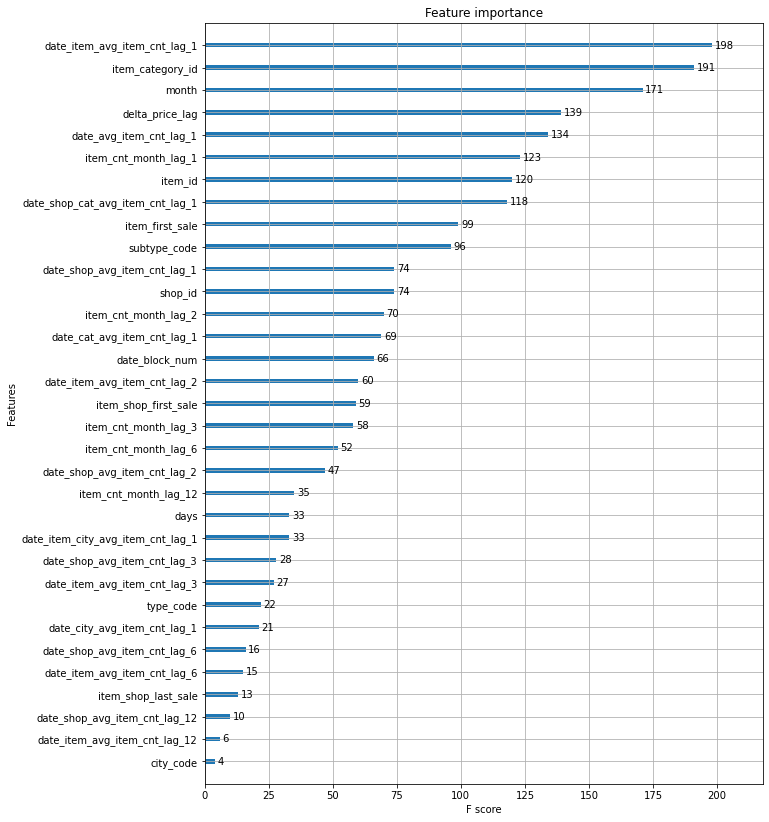

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(10,14))
plot_importance(model, ax=ax)#github greatlight98

In [ ]:
#github greatlight98